<a href="https://colab.research.google.com/github/Homiez09/nlp-review-colab/blob/main/Ass_3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

จงประยุกต์เทคนิค Classification ในการจำแนกข้อมูลผู้ป่วยเบาหวาน

In [92]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [93]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1GECPjQCZMjhh6cdD3T6mox09BP9f6CS3' -O diabetes.csv
df = pd.read_csv("diabetes.csv")

--2023-08-12 18:52:09--  https://docs.google.com/uc?export=download&id=1GECPjQCZMjhh6cdD3T6mox09BP9f6CS3
Resolving docs.google.com (docs.google.com)... 74.125.20.138, 74.125.20.101, 74.125.20.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-3k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hk0865v512mo7fr0bm4cchl7apnfl1lp/1691866275000/15795406498682877275/*/1GECPjQCZMjhh6cdD3T6mox09BP9f6CS3?e=download&uuid=324ca5ff-8c80-4f75-b166-275bf7a1075a [following]
--2023-08-12 18:52:09--  https://doc-04-3k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hk0865v512mo7fr0bm4cchl7apnfl1lp/1691866275000/15795406498682877275/*/1GECPjQCZMjhh6cdD3T6mox09BP9f6CS3?e=download&uuid=324ca5ff-8c80-4f75-b166-275bf7a1075a
Resolving doc-04-3k-docs.googleusercontent.com (doc-04-3k-docs.googleusercontent.com)... 108.177.98.132, 2607:f8b0:400e

In [94]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [95]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [96]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

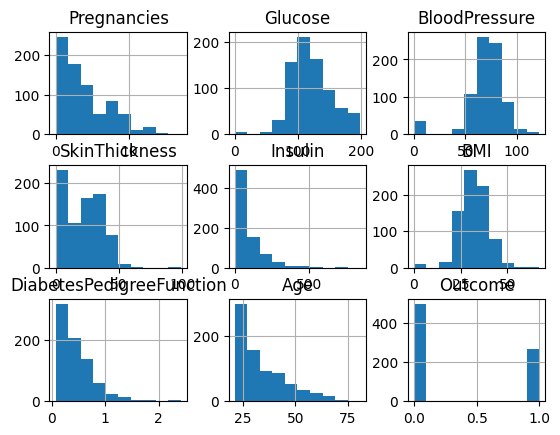

In [97]:
df.hist()

In [98]:
X = df.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [99]:
y = df.Outcome # เฉลย (0, 1)
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [100]:
X.shape # ข้อมูลที่รับเข้ามาทั้งหมด 768 row, 8 column

(768, 8)

# Decision Tree - Train/Test Split

In [101]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# แบ่งขั้นตอนไปเทรน 80% เทส 20%(test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [103]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree = dtree.fit(X_train, y_train)

In [104]:
y_predict = dtree.predict(X_test)

In [105]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       100
           1       0.56      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.69      0.68       154



# Naive Bayes - Cross Validation

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [107]:
model = GaussianNB()
cvs = cross_val_score(model, X, y, cv=10)
print('cross val scores', cvs.round(3))
print('mean - ', cvs.mean().round(4) * 100)

cross val scores [0.727 0.753 0.792 0.714 0.714 0.792 0.766 0.805 0.724 0.776]
mean -  75.64999999999999


# Naive Bayes - Train/Test split

In [108]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [110]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [111]:
y_predict = model.predict(X_test)

In [112]:
print('Accuracy Score: ', accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

Accuracy Score:  0.7705627705627706
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       149
           1       0.71      0.60      0.65        82

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [113]:
print(confusion_matrix(y_test, y_predict))

[[129  20]
 [ 33  49]]


# Random Forest - Train/Test split

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [116]:
model = RandomForestClassifier(n_estimators=80)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80)

In [131]:
class_names = df.Outcome.unique()
class_names.shape

(2,)

In [118]:
y_predict = model.predict(X_test)

Score -> 0.7597
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       100
           1       0.71      0.54      0.61        54

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154

[[88 12]
 [25 29]]


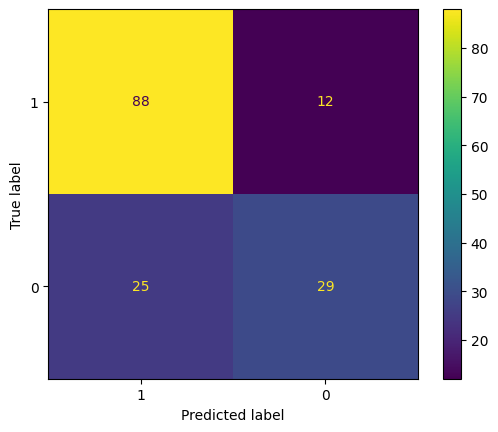

In [136]:
print('Score -> {:.4f}'.format(model.score(X_test, y_test)))
print(classification_report(y_test, y_predict))

confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
print(confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = class_names)
cm_display.plot()